## Final Project Submission

Please fill out:
* Student name: John Harrigan
* Student pace: full time
* Scheduled project review date/time: 10/7/2022
* Instructor name: Joseph Mata


# Film Industry Analysis
#### By John Harrigan

## Overview
Using detailed analysis of over a hundred thousand movies in the last few decades, it can be shown that there is a method to the madness that accompanies making a successful new movie. Microsoft can use this analysis choose the right genre of movie and the best staff to entrust with that movie's creation. 

## Business Problem
![microsoft](https://www.cnet.com/a/img/resize/f92ae43457ac52e0b761737181264a82aa0765bb/hub/2019/02/04/8311b046-6f2b-4b98-8036-e765f572efad/msft-microsoft-logo-2-3.jpg?auto=webp&fit=crop&height=675&width=1200)

This project is all about helping a new movie studio break into the film industry. Microsoft wants to know how to get in on the movie action
that has benefitted so many other companies. They want to know what specific factors are responcible for a new movie's success or downfall so that their new movie studio can have the best chance at the former and avoid the latter. 

In [2]:
import pandas as pd
import sqlite3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Clean up the larger numbers in the dataframes
pd.set_option('display.float_format', lambda x: '%.f' % x)

#upload the data from the various databases
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz', index_col=0)
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
conn = sqlite3.Connection('./zippedData/john/im.db')

# Cleaning our Datasets

## Cleaning the data from 'The Movie Database'
this will give us valuable information about the revenue genrated for several thousand movies

In [3]:
# I didnt need the original title of the movie
tmdb_df.drop('original_title', axis=1, inplace = True)
# Here i replace all of the genre cells that have no value with their own 'undecided' category
tmdb_df['genre_ids'].replace(to_replace= '[]', value = '[7]', inplace = True)
# This dictionary will translate the numbers into actuall genre strings
getGenre = {
    '7': 'undecided', '12': 'Adventure', '14': 'Fantasy', '16': 'Animation', '18': 'Drama', '27': 'Horror', '28': 'Action',
    '35': 'Comedy', '36': 'History', '37': 'Western', '53': 'Thriller', '80': 'Crime', '99': 'Documentary', 
    '878': 'Sci-Fi','9648': 'Mystery','10402': 'Music','10749':'Romance','10751': 'Family','10752': 'War','10770': 'TV'
}

# this function will take in a list of genres in string form, extract the numbers representing individual 
# genres, and use the above dictionary to return the actuall name of the genre
def convert(glist):
    description = ''
    for num in glist.strip('][').split(', '):
        description += getGenre[num]
        description += ','
    return description.rstrip(',')

# This will convert the genre numbers into genre titles
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].map(lambda x: convert(x))
# This will drop the unnecessary columns and then reorder the rest to be more organized
tmdb_df = tmdb_df[['title', 'release_date', 'genre_ids', 'popularity', 'vote_average', 'vote_count']]
# This will make the release date column into a datetime object column
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
# Drops the duplicate entries
tmdb_df.drop_duplicates(inplace=True)

In [4]:
#checks to see that the dataframe looks right
tmdb_df.head()

,title,release_date,genre_ids,popularity,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,"Adventure,Fantasy,Family",34,8,10788
1,How to Train Your Dragon,2010-03-26,"Fantasy,Adventure,Animation,Family",29,8,7610
2,Iron Man 2,2010-05-07,"Adventure,Action,Sci-Fi",29,7,12368
3,Toy Story,1995-11-22,"Animation,Comedy,Family",28,8,10174
4,Inception,2010-07-16,"Action,Sci-Fi,Adventure",28,8,22186


## Cleaning the data from 'The Numbers'

In [5]:
# changes the release_date column into a datetime column
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
# changes the string of production_budget into an int
tn_df['production_budget'] = tn_df['production_budget'].map(lambda x: int(x.replace('$','').replace(',','')))
# changes the domestic into an int
tn_df['domestic_gross'] = tn_df['domestic_gross'].map(lambda x: int(x.replace('$','').replace(',','')))
# changes the worldwide into an int
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].map(lambda x: int(x.replace('$','').replace(',','')))
# reorganizes the columns to be more organized
tn_df = tn_df[['movie', 'release_date', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [6]:
# makes sure the dataframe is correct
tn_df.head()

,movie,release_date,production_budget,domestic_gross,worldwide_gross
0,Avatar,2009-12-18,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875
2,Dark Phoenix,2019-06-07,350000000,42762350,149762350
3,Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000,620181382,1316721747


## Clean the data from 'Box Office Mojo'
this will give us even more revenue data and the more the merryer


In [7]:
# this will fill the empty values of foreign gross with zero
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna('0')
# this will convert the values in foreign gross from ints to stings
bom_df['foreign_gross'] = bom_df['foreign_gross'].map(lambda x: x.replace(',', '')).map(lambda x: float(x))
# this will convert the domestic gross to float
bom_df['domestic_gross'] = bom_df['domestic_gross'].astype(float)
# this will reorganize the columns
bom_df = bom_df[['title', 'year', 'domestic_gross', 'foreign_gross']]

In [8]:
# make sure that the database looks right
bom_df.head()

,title,year,domestic_gross,foreign_gross
0,Toy Story 3,2010,415000000,652000000
1,Alice in Wonderland (2010),2010,334200000,691300000
2,Harry Potter and the Deathly Hallows Part 1,2010,296000000,664300000
3,Inception,2010,292600000,535700000
4,Shrek Forever After,2010,238700000,513900000


# Merging Data

## Merge and clean the differnt tables from 'IMDB'
we will take in the different sql tables and put them together in order to get the info 
for the movie title, release date, runtime, votes, director, and actor

In [9]:
# this will get the relevant columns from the joined tables of movie_basics and movie_ratings using the common movie_id column
mvi = pd.read_sql('''
SELECT movie_id, (primary_title) AS title, (start_year) year, (runtime_minutes) AS runtime, genres,
(averagerating) AS avg_rating, numvotes
FROM movie_basics
LEFT JOIN movie_ratings
USING(movie_id)

''', conn)

# this will get the table of director info by joining the principals and persons tables
directors = pd.read_sql('''
SELECT movie_id, (primary_name) AS director
FROM principals
JOIN persons
USING(person_id)
WHERE category = 'director'
''', conn)
# there are sometimes multiple directors for each movie so these three lines will group them together by movie
directors = directors.drop_duplicates()
seperator = ','
directors = directors.groupby('movie_id').agg(lambda x: seperator.join(x.tolist())).reset_index()

# this will get the actors from the pricipals and perosn tables
actors = pd.read_sql('''
SELECT movie_id, (primary_name) AS actors
FROM principals
JOIN persons
USING(person_id)
WHERE category = 'actor'
ORDER BY movie_id
''', conn)
# this will do the same thing for the actors that happened with directors
actors = actors.drop_duplicates()
actors = actors.groupby('movie_id').agg(lambda x: seperator.join(x.tolist())).reset_index()

# first merge the tables of movies and directors
draft1 = pd.merge(mvi,directors, how = 'left', on = 'movie_id')
# then merge the result with the actors to get the final dataframe
sql_df = pd.merge(draft1, actors, how = 'left', on = 'movie_id')
# fill in the empty runtime rows witht the median so that you don't loose data
sql_df['runtime'].fillna(sql_df['runtime'].median(), inplace = True)
# now that everything is merged you no longer need the movie_id
sql_df.drop('movie_id', axis=1, inplace=True)
# get rid of the movies that are impossibly from the future
sql_df= sql_df[sql_df['year'] <= 2024]
# drop all of the empty records from the genres column because there are only a few and will not affect the larger dataframe
sql_df.dropna(subset=['genres'], inplace=True)
# drop the duplicate entries
sql_df.drop_duplicates(inplace=True)

In [11]:
# check that the dataframe is correct
sql_df.head()

,title,year,runtime,genres,avg_rating,numvotes,director,actors
0,Sunghursh,2013,175,"Action,Crime,Drama",7,77,Harnam Singh Rawail,"Dilip Kumar,Balraj Sahni,Sanjeev Kumar"
1,One Day Before the Rainy Season,2019,114,"Biography,Drama",7,43,Mani Kaul,"Arun Khopkar,Om Shivpuri"
2,The Other Side of the Wind,2018,122,Drama,7,4517,Orson Welles,"John Huston,Peter Bogdanovich"
3,Sabse Bada Sukh,2018,87,"Comedy,Drama",6,13,Hrishikesh Mukherjee,"Rabi Ghosh,Vijay Arora,Asrani,Utpal Dutt"
4,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy",6,119,"Raoul Ruiz,Valeria Sarmiento","Luis Alarcón,Francisco Reyes"


## Merge 'Box Office Mojo' with 'The Numbers'
we merge these tables together because they have almost the exact same data, makeing it a conveinient source for
the revenue of each movie

In [14]:
# this will merge the two dataframes that share the common info about movie revenue
bomtn = pd.merge(bom_df, tn_df, how='outer', left_on='title', right_on='movie')

# making the first title column the primary so you fill it up where it is empty with the secondary title column
bomtn['title'] = bomtn['title'].fillna(bomtn['movie'])
# fill in the gaps witht the second domestic column
bomtn['domestic_gross_x'] = bomtn['domestic_gross_x'].fillna(bomtn['domestic_gross_y'])
# fill in the gaps with the difference in the worldwide and domestic secondary columns
bomtn['foreign'] = (bomtn['worldwide_gross'] - bomtn['domestic_gross_y']).fillna(bomtn['foreign_gross'])
# fill the release date with the converted datetime from the second date column
bomtn['release_date'] = bomtn['release_date'].fillna(pd.to_datetime(bomtn['year'], format='%Y'))
# fill the worldwide gross with the sum of the domestic and foreign
bomtn['worldwide_gross'] = bomtn['worldwide_gross'].fillna(bomtn['domestic_gross_x'] + bomtn['foreign_gross'])
# reorganize the columns and drop the unnecessary columns
bomtn = bomtn[['title','release_date', 'domestic_gross_x', 'foreign', 'worldwide_gross']]
# rename the domestic column to be more readible
bomtn.rename(columns={'domestic_gross_x':'domestic_gross'}, inplace=True)

# drop all of the data that is empyt
bomtn.dropna(inplace=True)
bomtn = bomtn[bomtn['worldwide_gross'] != 0.0]

In [15]:
# check the dataframe
bomtn

,title,release_date,domestic_gross,foreign,worldwide_gross
0,Toy Story 3,2010-06-18,415000000,653874642,1068879522
1,Alice in Wonderland (2010),2010-01-01,334200000,691300000,1025500000
2,Harry Potter and the Deathly Hallows Part 1,2010-01-01,296000000,664300000,960300000
3,Inception,2010-07-16,292600000,542948447,835524642
4,Shrek Forever After,2010-05-21,238700000,517507886,756244673
...,...,...,...,...,...
7924,Cavite,2006-05-26,70071,1573,71644
7925,The Mongol King,2004-12-31,900,0,900
7927,Following,1999-04-02,48482,192013,240495
7928,Return to the Land of Wonders,2005-07-13,1338,0,1338


### No Good
as we can see even after we have merged the two datasets together it is still much to small a sample to work with our other much larger datasets. Also as seen below, some of the data for the foreign gross is missing or incorect. Both of these reasons lead to the conclusion that we must find another way to measure movie success other than the revenue they generate.

In [16]:
# this notes all of the data that have missing data in the foriegn column
bomtn[(bomtn.domestic_gross > 10000000) & (bomtn.foreign < 1000000)].head()

,title,release_date,domestic_gross,foreign,worldwide_gross
15,The Karate Kid,1984-06-22,176600000,0,90815558
96,Tyler Perry's Why Did I Get Married Too?,2010-01-01,60100000,578000,60678000
97,Secretariat,2010-10-08,59700000,676734,60376247
123,For Colored Girls,2010-11-05,37700000,288175,38017873
141,Just Wright,2010-05-14,21500000,327302,21867665


## Merge the tmdb_df and sql_df databases
this will give us more rows of data to work with and it will fill some of the holes in each dataset

In [17]:
# merge the two dataframes
tmdbsql = pd.merge(sql_df, tmdb_df,how ='outer', on='title' )
# fill in the missing info with the other columns
tmdbsql['avg_rating'] = tmdbsql['avg_rating'].fillna(tmdbsql['vote_average'])
tmdbsql['numvotes'] = tmdbsql['numvotes'].fillna(tmdbsql['vote_count'])
tmdbsql['genres'] = tmdbsql['genres'].fillna(tmdbsql['genre_ids'])
tmdbsql['year'] = pd.to_datetime(tmdbsql['year'], format='%Y').fillna(tmdbsql['release_date'])
# drop the duplicate columns
tmdbsql.drop(['release_date', 'genre_ids', 'popularity', 'vote_average', 'vote_count'], axis=1, inplace = True)
# sort the values by number of votes which indicates the popularity of the movie
tmdbsql = tmdbsql.sort_values('numvotes', ascending=False)
# get rid of the smaller movies with less than a hundred reviews
tmdbsql = tmdbsql[tmdbsql['numvotes'] > 100]
# change the datetime to be just the year because that is all we care about
tmdbsql['year'] = pd.DatetimeIndex(tmdbsql['year']).year

In [18]:
tmdbsql.head()

,title,year,runtime,genres,avg_rating,numvotes,director,actors
8626,Inception,2010,148,"Action,Adventure,Sci-Fi",9,1841066,Christopher Nolan,"Leonardo DiCaprio,Joseph Gordon-Levitt,Ken Wat..."
8401,The Dark Knight Rises,2012,164,"Action,Thriller",8,1387769,Christopher Nolan,"Christian Bale,Tom Hardy,Gary Oldman"
470,Interstellar,2014,169,"Adventure,Drama,Sci-Fi",9,1299334,Christopher Nolan,Matthew McConaughey
24912,Django Unchained,2012,165,"Drama,Western",8,1211405,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio"
526,The Avengers,2012,143,"Action,Adventure,Sci-Fi",8,1183655,Joss Whedon,"Robert Downey Jr.,Chris Evans,Jeremy Renner"


# Analyze

## Analyze the data and make a graph showing the popularity of each genre
You can do this by looking at the total number of reviews which is strong indicator of popularity since the more people
that watch the movie the more poeple that write reviews

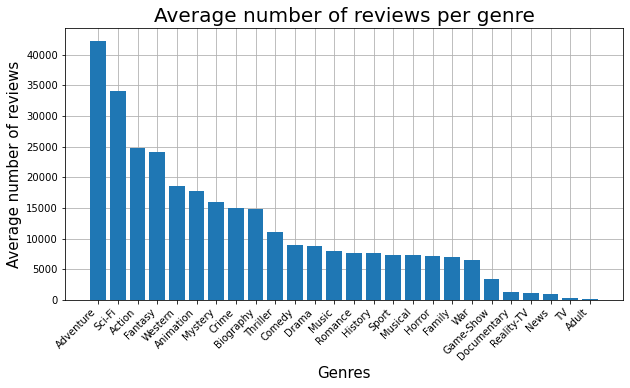

In [20]:
# make a dataframe purley for this graph
genre_pop = tmdbsql.dropna(subset=['avg_rating', 'numvotes'])

#this loop will get the string list of genres and put each individual genre in a list
categories = []
for grlist in genre_pop['genres']:
    for item in grlist.split(','):
        categories.append(item)   

# this set will show the complete list of all genre types with no duplicates
allGenres = set(categories)

# this for loop will go though the genres column and calculate each genres popularity by
# finding the mean number of votes for each genre then putting that info into a dict
popularity = {}   
for genre in allGenres:
    avg = genre_pop[genre_pop['genres'].str.contains(genre)]['numvotes'].mean()
    popularity[genre] = avg
    
# this puts the dict info into an easy format for the graph
x = sorted(popularity, key=popularity.get, reverse = True)
y = sorted(popularity.values(), reverse = True)

# this graphs the average number of reviews per genre
fig, ax= plt.subplots(figsize=(10,5))
ax.grid(zorder=0)
ax.bar(x, y, zorder=3)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Average number of reviews', fontsize=15)
ax.set_title('Average number of reviews per genre', fontsize=20)
plt.xticks(rotation=45, ha='right')

plt.show();

## Analyze the directors to find the best of the best 
Using the previous graph we can find the most successful directors for each of the four most popular genres.
This first block is my own function that will take a genre string as a parameter as a string and return a nested list 
containing the names and average number of reviews for each of the three most successful directors in each of the four most
popular genres

In [21]:
# takes the genre as a string parameter
def getBestDirectors(genre):
    # these are samples of the bigger dataframe used specifically for this graph
    best_direct = tmdbsql.dropna(subset = ['director', 'numvotes'])
    movies = best_direct[best_direct['genres'].str.contains(genre)]

    # this for loop finds a list of all the directors for all the movies
    master_list = []
    for dlist in movies['director']:
        for direct in dlist.split(','):
            master_list.append(direct)
            
    # this set eliminates the duplicate directors
    directors = set(master_list)

    # this for loop will create a dictionary that has the names of each director for keys and their success measured by 
    # the mean number of reviews as the values
    director_success = {}
    for director in directors:
        success = movies[movies['director'].str.contains(director)]['numvotes'].mean()
        director_success[director] = success
    
    # this puts the dict info into a easier form for the graph and limits it to just the top three directors
    x = sorted(director_success, key = director_success.get, reverse = True)[:3]
    y = sorted(director_success.values(), reverse=True)[:3]
    
    return [x, y]

In [22]:
# these lines get the info for the top three directors for each of the four genres
action = getBestDirectors('Action')
adventure = getBestDirectors('Adventure')
scifi = getBestDirectors('Sci-Fi')
fantasy = getBestDirectors('Fantasy')

# this gets the masterlist for the best directors and the top genres
the_best = set(action[0] + adventure[0] + scifi[0] + fantasy[0])
top_genres = ['Action', 'Adventure', 'Sci-Fi', 'Fantasy']

# these lines will clean up the dataframe so that only the information about the relvent direcotrs and genres remains
bdf = tmdbsql.dropna(subset = ['director', 'actors', 'numvotes'])
bdf = bdf[['genres', 'numvotes', 'director']]
bdf = bdf[bdf['genres'].map(lambda x: any(substr in x for substr in top_genres))]
bdf = bdf[bdf['director'].map(lambda x: any(substr in x for substr in the_best))]

# this fore loop will go through and split up the director list for movies that have multiple directors and put the new 
# duplicated entries in a new dataframe
splitdir = pd.DataFrame(columns = ['genres', 'numvotes', 'director'])
for x, y in bdf.iterrows():
    for director in y['director'].split(','):
        splitdir.loc[len(splitdir.index)] = [y['genres'], y['numvotes'], director]
        
# this fore loop does the same thing as the one above except for the list of genres rather than directors
newdf = pd.DataFrame(columns = ['genres', 'numvotes', 'director'])
for x, y in splitdir.iterrows():
    for genre in y['genres'].split(','):
        newdf.loc[len(newdf.index)] = [genre, y['numvotes'], y['director']]
        
# after splitting up the genres we will get some entries that are not one of the four we are looking for so we filter them out
newdf = newdf[newdf['genres'].map(lambda x: x in top_genres)]
newdf = newdf[newdf['director'].map(lambda x: x in the_best)]

C:\Users\jackl\AppData\Local\Temp\ipykernel_37776\3608296136.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('0 reviews', '200,000', '400,000', '600,000', '800,000',


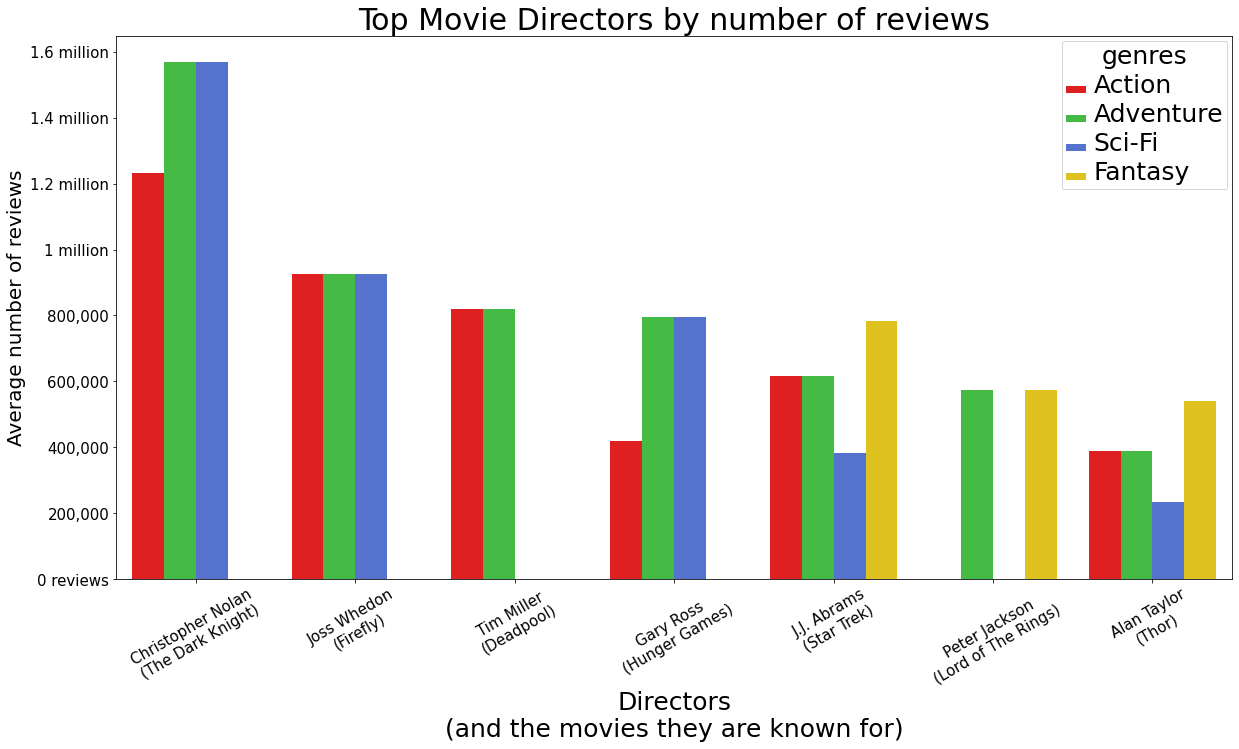

In [23]:
# this will graph the popularity of each director according to number of votes per each of the four genres
fig, ax = plt.subplots(figsize=(20,10))
g = sns.barplot(data=newdf, x='director', y='numvotes', hue='genres', 
            ax=ax, ci=None, palette=['red','limegreen','royalblue', 'gold'])
ax.set_xlabel('Directors\n(and the movies they are known for)', fontsize=25)
ax.set_ylabel('Average number of reviews', fontsize = 20)
ax.set_title('Top Movie Directors by number of reviews', fontsize=30)
ax.set_yticklabels(('0 reviews', '200,000', '400,000', '600,000', '800,000',
                    '1 million', '1.2 million', '1.4 million', '1.6 million'), fontsize=15)
# the directors and the movies they are known for
ax.set_xticklabels(('Christopher Nolan\n(The Dark Knight)', 'Joss Whedon\n(Firefly)', 'Tim Miller\n(Deadpool)',
                    'Gary Ross\n(Hunger Games)', 'J.J. Abrams\n(Star Trek)', 
                    'Peter Jackson\n(Lord of The Rings)', 'Alan Taylor\n(Thor)'), fontsize=15)

# rotate the xticks and make the legend bigger
plt.xticks(rotation=30, ha='center')
plt.setp(g.get_legend().get_texts(), fontsize='25') 
plt.setp(g.get_legend().get_title(), fontsize='25')

plt.show()

## Analysis of the best Actors for the top four genres
this graph will do the same thing that the directors graph did just for the actors instead

In [24]:
# give the function the genre and it will give you the top three actors
def getBestActors(genre):
    # the sample dataframes just for this graph
    best_actor = tmdbsql.dropna(subset = ['actors', 'numvotes'])
    movies = best_actor[best_actor['genres'].str.contains(genre)]
    
    # creates a masterlist of the names of all the actors in the database
    master_list = []
    for alist in movies['actors']:
        for actor in alist.split(','):
            master_list.append(actor)
            
    # gets rid of duplicate actor names
    actors = set(master_list)

    # calculates the success of the actor based on the mean number of votes and stores the result into a dict
    actor_success = {}
    for actor in actors:
        success = movies[movies['actors'].str.contains(actor)]['numvotes'].mean()
        actor_success[actor] = success
    
    # puts the dict into a format that is easier for the graph and limits it to the top 3
    x = sorted(actor_success, key = actor_success.get, reverse = True)[:3]
    y = sorted(actor_success.values(), reverse=True)[:3]
    
    return [x, y]

In [25]:
# calculates the best actors for each of the four most popular genres
actor_action = getBestActors('Action')
actor_adventure = getBestActors('Adventure')
actor_scifi = getBestActors('Sci-Fi')
actor_fantasy = getBestActors('Fantasy')

# gets the best actors per genre
best_actors = set(actor_action[0] + actor_adventure[0] + actor_scifi[0] + actor_fantasy[0])
top_genres = ['Action', 'Adventure', 'Sci-Fi', 'Fantasy']

# gets a dataframe we can use for the graph
actdf = tmdbsql.dropna(subset = ['director', 'actors', 'numvotes'])
actdf = actdf[['genres', 'numvotes', 'actors']]
actdf = actdf[actdf['genres'].map(lambda x: any(substr in x for substr in top_genres))]
actdf = actdf[actdf['actors'].map(lambda x: any(substr in x for substr in best_actors))]

# splits up the actors lists per movie
splitactor = pd.DataFrame(columns = ['genres', 'numvotes', 'actor'])
for x, y in actdf.iterrows():
    for actor in y['actors'].split(','):
        splitactor.loc[len(splitactor.index)] = [y['genres'], y['numvotes'], actor]

# splits up the genres list per movie
actor_df = pd.DataFrame(columns = ['genres', 'numvotes', 'actor'])
for x, y in splitactor.iterrows():
    for genre in y['genres'].split(','):
        actor_df.loc[len(actor_df.index)] = [genre, y['numvotes'], y['actor']]
        
# takes out the data we don't need
actor_df = actor_df[actor_df['genres'].map(lambda x: x in top_genres)]
actor_df = actor_df[actor_df['actor'].map(lambda x: x in best_actors)]

C:\Users\jackl\AppData\Local\Temp\ipykernel_37776\1049375171.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(('0 reviews', '200,000', '400,000', '600,000', '800,000',


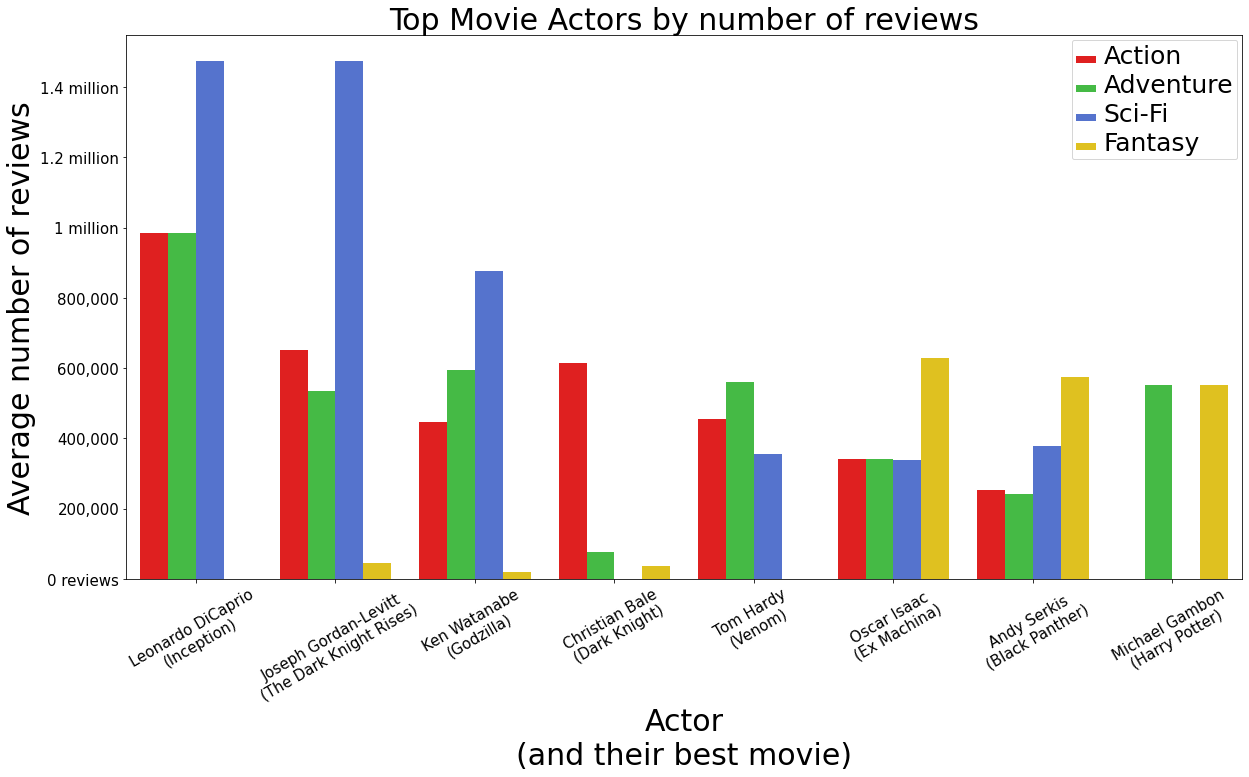

In [26]:
# the same graph we did for directors now for actors

fig, ax = plt.subplots(figsize=(20,10))
t = sns.barplot(data=actor_df, x='actor', y='numvotes', hue='genres', 
            ax=ax, ci=None, palette=['red','limegreen','royalblue', 'gold'])
ax.set_xlabel('Actor\n(and their best movie)', fontsize=30)
ax.set_ylabel('Average number of reviews', fontsize = 30)
ax.set_title('Top Movie Actors by number of reviews', fontsize=30)
ax.set_yticklabels(('0 reviews', '200,000', '400,000', '600,000', '800,000',
                    '1 million', '1.2 million', '1.4 million', '1.6 million'), fontsize=15)
ax.set_xticklabels(('Leonardo DiCaprio\n(Inception)', 'Joseph Gordan-Levitt\n(The Dark Knight Rises)', 
                    'Ken Watanabe\n(Godzilla)', 'Christian Bale\n(Dark Knight)', 'Tom Hardy\n(Venom)',
                    'Oscar Isaac\n(Ex Machina)', 'Andy Serkis\n(Black Panther)', 'Michael Gambon\n(Harry Potter)'), fontsize=15)
plt.legend(loc='upper right')
plt.setp(t.get_legend().get_texts(), fontsize='25') 


plt.xticks(rotation=30, ha='center')

plt.show()

## Conclusions
The results of the analysis show a clear path for what a new movie studio should do to make the next big blockbuster:

- **Pick a movie genre among the top four most popular genres.** based on analysis the most popular and successful movie genres are Adventure, Sci-Fi, Action, and Fantasy.
- **Choose the director that has had the most success in the chosen genre.** From the data we can see that Christopher Nolan has had the most success in Action, Sci-Fi and Adventure while J.J. Abrams has had the most success in Fantasy.
- **Hire the most talented actor for the leading role.** The project's analysis cleary shows that Leonardo DiCaprio is the best overall actor and would be the first guy to cast for the main character. Although if you made a Fantasy movie you might want to consider Oscar Isaac.

## Next Steps
More comprehensive analysis could help to get even more specific steps for making the movie

- **Getting a bigger dataset.** This would allow for a bigger pool of top list actors and directors to choose from. The bigger dataset could also be used to fill in some of the holes in the existing dataset
- **Finding data specifically for revenue.** This project used the number of ratings as a measure of popularity/success because it was the best data set available. The total amount of revenue would have been a much strong indicator except that the database containing that information was substantially smaller and had many erroneous values. This made it unsuitable to analyze the rest of the dataset.
- **Calculating the specific correlations between each actor and director.** Once the best actor and director for a genre have been chosen, a more thourogh analysis could be done to see, of the best actors and directors, which pair work the best in concert with each other. This could lead to much more specific recommendations for starting a new movie.